In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
#from generate import generate_maze ?
from itertools import groupby
import random

In [ ]:
from dataclasses import dataclass, field

@dataclass
class MazeCell:
    x: int
    y: int
    component: int
    is_open: bool = field(default=False)
    walls: list = field(default_factory=list)

In [ ]:
N = 30
LINE_WIDTH = 1

In [ ]:
"""
"""
maze = []
parents  = []
ranks = []
used = []

# Находит компоненту связности для x (корень дерева)
# С эвристикой path_compression
def find(x):
    stack = []

    while x != parents[x]:
      stack.append(x)
      x = parents[x]
    while len(stack) != 0:
      cell_index = stack.pop()
      parents[cell_index] = x

    return x

# Объединяет два несвязанных множества в одно, соединяя их корни
# С эвристикой union_by_rank
def union(x, y):
    x_root = find(x.component)
    y_root = find(y.component)

    parents[y_root] = x_root

# Возвращает соседей по часовой стрелке (сверху, справа, снизу, слева)
def find_neighbours(maze_cell):
  x, y = maze_cell.x,  maze_cell.y
  neighbours = []
  if y + 1 < N:
    neighbours.append(maze[x][y + 1])
  if x + 1 < N:
    neighbours.append(maze[x + 1][y])
  if y - 1 >= 0:
    neighbours.append(maze[x][y - 1])
  if x - 1 >= 0:
    neighbours.append(maze[x - 1][y])
  return neighbours


# Проверяет, принадлежит ли весь лабиринт одной компоненте связности (parents)
def all_equal(iterable):
   g = groupby(iterable)
   return next(g, True) and not next(g, False)


def delete_walls(cell_1, cell_2):
  x, y = cell_2.x - cell_1.x, cell_2.y - cell_1.y

  if y > 0:
    cell_2.walls[0] = False
    cell_1.walls[2] = False
  elif y < 0:
    cell_2.walls[2] = False
    cell_1.walls[0] = False
  elif x > 0:
    cell_2.walls[3] = False
    cell_1.walls[1] = False
  elif x < 0:
    cell_2.walls[1] = False
    cell_1.walls[3] = False


def generate_maze(N) -> list[list[MazeCell]]:
    num = 0
    for i in range(N):
      row = []
      for j in range(N):
        row.append(MazeCell(i, j, num, False, [True, True, True, True]))
        parents.append(num)
        num += 1
      maze.append(row)

    while not all_equal(parents):
      random_cell = random.choice(random.choice(maze))
      random_neighbour = random.choice(find_neighbours(random_cell))

      if find(random_cell.component) != find(random_neighbour.component):
        union(random_cell, random_neighbour)
        delete_walls(random_cell, random_neighbour)
        used.append(random_cell)

    # Открываем один вход и выход (сверху и снизу, соответственно)
    maze[0][0].is_open = True
    maze[0][0].walls[0] = False
    maze[-1][-1].is_open = True
    maze[-1][-1].walls[2] = False

    return maze

In [ ]:
maze = generate_maze(N)

In [ ]:
def draw_maze(maze_):
    for i in range(N):
      for j in range(N):
        cell = maze_[i][j]

        if cell.walls[0]:
          plt.plot([cell.x, cell.x + LINE_WIDTH], [N - cell.y, N - cell.y], 'k-', lw=2)
        if cell.walls[1]:
          plt.plot([cell.x + LINE_WIDTH, cell.x + LINE_WIDTH], [N - cell.y, N - cell.y - LINE_WIDTH], 'k-', lw=2)
        if cell.walls[2]:
          plt.plot([cell.x, cell.x + LINE_WIDTH], [N - cell.y - LINE_WIDTH, N - cell.y - LINE_WIDTH], 'k-', lw=2)
        if cell.walls[3]:
          plt.plot([cell.x, cell.x], [N - cell.y, N - cell.y - LINE_WIDTH], 'k-', lw=2)

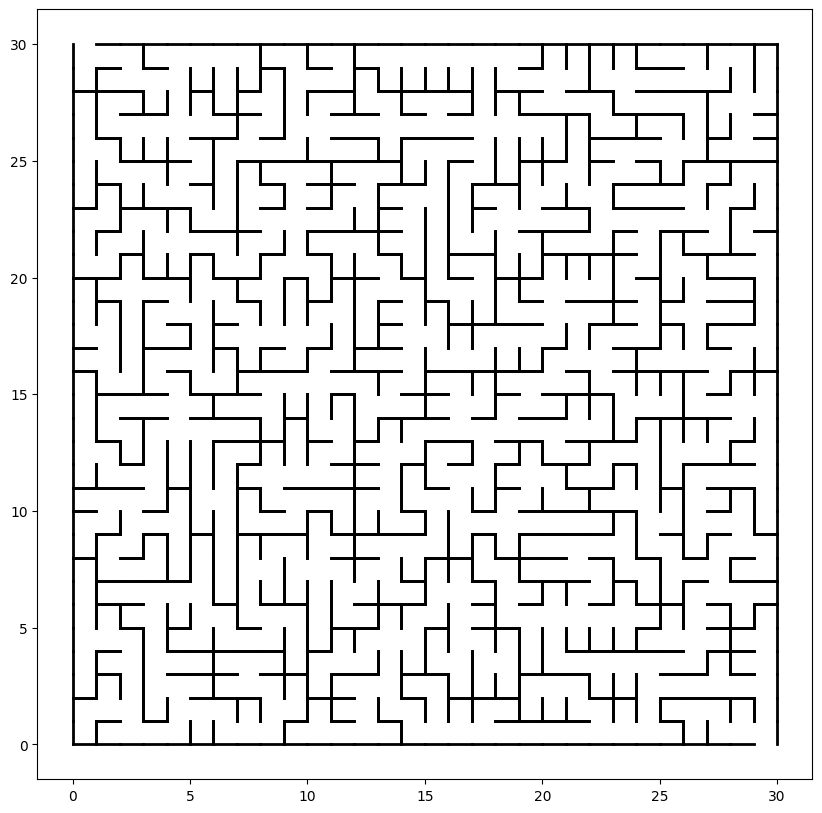

In [ ]:
fig = plt.figure(figsize=(10, 10))

draw_maze(maze)

plt.show()